<a href="https://colab.research.google.com/github/Mukundh1234/Tourist-Behaviour-Analysis/blob/main/BDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies for working with Excel files in Spark
!pip install pyspark
!pip install openpyxl
!pip install com.crealytics:spark-excel_2.12:0.13.5 --quiet  # For reading Excel files with Spark

# Install necessary libraries for data visualization and scikit-learn
!pip install seaborn scikit-learn matplotlib pandas


ERROR: Invalid requirement: 'com.crealytics:spark-excel_2.12:0.13.5': Expected end or semicolon (after name and no valid version specifier)
    com.crealytics:spark-excel_2.12:0.13.5
                  ^


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, regexp_replace, when
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score


In [ ]:
spark = SparkSession.builder.appName("TouristBehaviorAnalysis").getOrCreate()


In [ ]:
# Install required packages
!pip install pyspark
!pip install -q findspark
!pip install -q openpyxl  # This is needed for reading .xlsx files

# Initialize findspark
import findspark
findspark.init()

# Create Spark session with the Excel data source
from pyspark.sql import SparkSession

# Adjust the version of the Excel package as needed
spark = SparkSession.builder \
    .appName("TouristBehaviorAnalysis") \
    .config("spark.jars.packages", "com.crealytics:spark-excel_2.12:0.14.0") \
    .getOrCreate()


In [ ]:
# Install required packages
!pip install pyspark
!pip install -q findspark
!pip install -q openpyxl  # Required for reading Excel files
!pip install pandas  # To load the Excel file

# Initialize findspark
import findspark
findspark.init()

# Create Spark session
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType

spark = SparkSession.builder \
    .appName("TouristBehaviorAnalysis") \
    .getOrCreate()

# Use Pandas to read the Excel file
import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the Excel file using Pandas
file_path = next(iter(uploaded))  # Get the uploaded file name
pandas_df = pd.read_excel(file_path)

# Convert Pandas DataFrame to Spark DataFrame
spark_df = spark.createDataFrame(pandas_df)

# Show the first few rows to confirm data has loaded correctly
spark_df.show(5)


Saving Merged_Tourist_Attractions 12.xlsx to Merged_Tourist_Attractions 12 (1).xlsx
+--------------------+-----------+------------------+--------------------+-----------+----+--------------------+
|          Place Name|       City|              Type|Best Visiting Months|   Visitors|year|         Description|
+--------------------+-----------+------------------+--------------------+-----------+----+--------------------+
|        Yercaud Lake|    Yercaud|Natural Attraction|       April to June|     150000|2001|Scenic lake, surr...|
|           Auroville| Puducherry| Cultural Landmark|    October to March|     100000|2001|International com...|
|Thiruvalluvar Statue|Kanyakumari|          Landmark|    October to March|     200000|2001|Huge statue of po...|
|     Tirupati Temple|   Tirupati|    Religious Site|    October to March| 15 million|2001|Famous Hindu pilg...|
|           Amaravati|  Amaravati|   Historical Site|    October to March|0.9 million|2001|Buddhist Stupa, r...|
+-----------

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving Merged_Tourist_Attractions 12.xlsx to Merged_Tourist_Attractions 12 (2).xlsx


In [ ]:
from google.colab import files
import pandas as pd
from pyspark.sql import SparkSession

# Step 1: Upload the Excel file
uploaded = files.upload()

# Step 2: Initialize Spark session
spark = SparkSession.builder.appName("TouristBehaviorAnalysis").getOrCreate()

# Step 3: Read the uploaded Excel file using pandas
# The key will be the filename you uploaded
pdf = pd.read_excel(next(iter(uploaded.keys())))

# Step 4: Convert the Pandas DataFrame to a Spark DataFrame
spark_df = spark.createDataFrame(pdf)

# Step 5: Show the first few rows to confirm data has loaded correctly
spark_df.show(5)


Saving Merged_Tourist_Attractions 12.xlsx to Merged_Tourist_Attractions 12 (3).xlsx
+--------------------+-----------+------------------+--------------------+-----------+----+--------------------+
|          Place Name|       City|              Type|Best Visiting Months|   Visitors|year|         Description|
+--------------------+-----------+------------------+--------------------+-----------+----+--------------------+
|        Yercaud Lake|    Yercaud|Natural Attraction|       April to June|     150000|2001|Scenic lake, surr...|
|           Auroville| Puducherry| Cultural Landmark|    October to March|     100000|2001|International com...|
|Thiruvalluvar Statue|Kanyakumari|          Landmark|    October to March|     200000|2001|Huge statue of po...|
|     Tirupati Temple|   Tirupati|    Religious Site|    October to March| 15 million|2001|Famous Hindu pilg...|
|           Amaravati|  Amaravati|   Historical Site|    October to March|0.9 million|2001|Buddhist Stupa, r...|
+-----------

In [ ]:
# Cleaning the "Visitors" column
spark_df = spark_df.withColumn("Visitors", regexp_replace(col("Visitors"), ",", "")) \
                   .withColumn("Visitors", when(col("Visitors").contains("million"),
                                  regexp_replace(col("Visitors"), "million", "").cast("double") * 1e6) \
                                  .otherwise(col("Visitors").cast("double")))

# Drop rows with missing "Visitors" data
spark_df = spark_df.dropna(subset=["Visitors"])
spark_df.show(5)  # Display cleaned data for verification


+--------------------+-----------+------------------+--------------------+--------+----+--------------------+
|          Place Name|       City|              Type|Best Visiting Months|Visitors|year|         Description|
+--------------------+-----------+------------------+--------------------+--------+----+--------------------+
|        Yercaud Lake|    Yercaud|Natural Attraction|       April to June|150000.0|2001|Scenic lake, surr...|
|           Auroville| Puducherry| Cultural Landmark|    October to March|100000.0|2001|International com...|
|Thiruvalluvar Statue|Kanyakumari|          Landmark|    October to March|200000.0|2001|Huge statue of po...|
|     Tirupati Temple|   Tirupati|    Religious Site|    October to March|   1.5E7|2001|Famous Hindu pilg...|
|           Amaravati|  Amaravati|   Historical Site|    October to March|900000.0|2001|Buddhist Stupa, r...|
+--------------------+-----------+------------------+--------------------+--------+----+--------------------+
only showi

In [ ]:
df = spark_df.toPandas()


In [ ]:
# Create the pivot table
pivot_df = df.pivot_table(
    index=['Place Name', 'City', 'Type', 'Best Visiting Months', 'Description'],
    columns='year',
    values='Visitors',
    fill_value=0  # Fill missing values with 0
)

# Reset the index of the pivot table
pivot_df.reset_index(inplace=True)

# Rename the columns for better readability
pivot_df.columns = list(pivot_df.columns[:5]) + [f'Visitor {int(year)}' for year in pivot_df.columns[5:]]

# Show the pivot table
print(pivot_df)  # In Pandas
# Or simply use:
# pivot_df  # This will display the DataFrame in Jupyter Notebook


         Place Name           City                Type  \
0              Aalo           Aalo  Natural Attraction   
1              Aalo           Aalo  Natural Attraction   
2     Aam Khas Bagh       Amritsar   Historical Garden   
3     Aam Khas Bagh       Amritsar   Historical Garden   
4      Aarey Colony         Mumbai      Nature Reserve   
...             ...            ...                 ...   
1963          Zuluk    East Sikkim      Scenic Village   
1964      Zunheboto  Cultural Town    October to April   
1965      Zunheboto  Cultural Town    October to April   
1966      Zunheboto      Zunheboto       Cultural Town   
1967     oktak Lake        Moirang      Natural Wonder   

             Best Visiting Months  \
0                March to October   
1                March to October   
2               Mughal-era garden   
3                October to March   
4                October to March   
...                           ...   
1963                March to June   
1964  K

In [ ]:
# Define the desired columns for features and target variable
desired_columns = ['Visitor 2018', 'Visitor 2019', 'Visitor 2020', 'Visitor 2021', 'Visitor 2022', 'Visitor 2023', 'Visitor 2024']
available_columns = [col for col in desired_columns if col in pivot_df.columns]  # Check if columns exist

# Prepare feature DataFrame (X)
X = pivot_df[available_columns[:-1]]  # Exclude 'Visitor 2024' from features

# Check if 'Visitor 2024' is available before using it as the target (y)
if 'Visitor 2024' in pivot_df.columns:
    y = pivot_df['Visitor 2024']
else:
    print("Target column 'Visitor 2024' is missing.")
    y = None

# Display the feature DataFrame (X) and target variable (y) if they exist
print("Feature DataFrame (X):")
print(X)

if y is not None:
    print("\nTarget Variable (y):")
    print(y)
else:
    print("\nTarget variable 'y' is not available.")


Feature DataFrame (X):
      Visitor 2018  Visitor 2019  Visitor 2020  Visitor 2021  Visitor 2022  \
0           3200.0        3800.0         900.0           0.0           0.0   
1          12000.0       12500.0        7000.0     6000000.0     7000000.0   
2              0.0           0.0           0.0           0.0           0.0   
3         340000.0      440000.0      380000.0        5000.0        6000.0   
4         110000.0      160000.0       15000.0           0.0           0.0   
...            ...           ...           ...           ...           ...   
1963           0.0           0.0       70000.0           0.0           0.0   
1964           0.0           0.0           0.0           0.0           0.0   
1965           0.0           0.0           0.0           0.0           0.0   
1966       44000.0       44000.0       30000.0       18000.0       26000.0   
1967           0.0           0.0           0.0           0.0           0.0   

      Visitor 2023  
0              0.0 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

if y is not None:
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the Random Forest model
    rf = RandomForestRegressor(random_state=42)

    # Hyperparameter tuning using RandomizedSearchCV
    param_dist = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4, 5],
        'bootstrap': [True, False]
    }

    # Perform RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                       n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)

    # Fit the model to the training data
    random_search.fit(X_train, y_train)

    # Best estimator from the random search
    best_rf = random_search.best_estimator_

    print("Model training complete with the best hyperparameters:", random_search.best_params_)

    # Make predictions
    y_pred = best_rf.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = r2 * 100  # Convert to percentage

    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")
    print(f"Accuracy: {accuracy:.2f}%")

    # Check if accuracy meets the target
    if accuracy >= 90:
        print("Target accuracy achieved.")
    else:
        print(f"Accuracy below target, currently at {accuracy:.2f}%.")
        # Optionally, implement a strategy for retrying with different parameters or alerting the user

    # Predict visitor counts for 2025 using the full dataset
    pivot_df['Predicted Visitor 2025'] = best_rf.predict(X)

    # Display predicted data
    print(pivot_df[['Place Name', 'City', 'Predicted Visitor 2025']].head())

    # Save predictions to an Excel file
    output_file = '/content/visitors_predictions_2025.xlsx'
    pivot_df.to_excel(output_file, index=False)
    print(f"Predicted data for 2025 saved to {output_file}")
else:
    print("Model training skipped as 'Visitor 2024' is not available.")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Model training complete with the best hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}
Mean Absolute Error: 873172527.6841085
R-squared: -2.2334987059423326
Accuracy: -223.35%
Accuracy below target, currently at -223.35%.
      Place Name      City  Predicted Visitor 2025
0           Aalo      Aalo            0.000000e+00
1           Aalo      Aalo            8.847557e+06
2  Aam Khas Bagh  Amritsar            3.723441e+02
3  Aam Khas Bagh  Amritsar            9.006587e+03
4   Aarey Colony    Mumbai            0.000000e+00
Predicted data for 2025 saved to /content/visitors_predictions_2025.xlsx


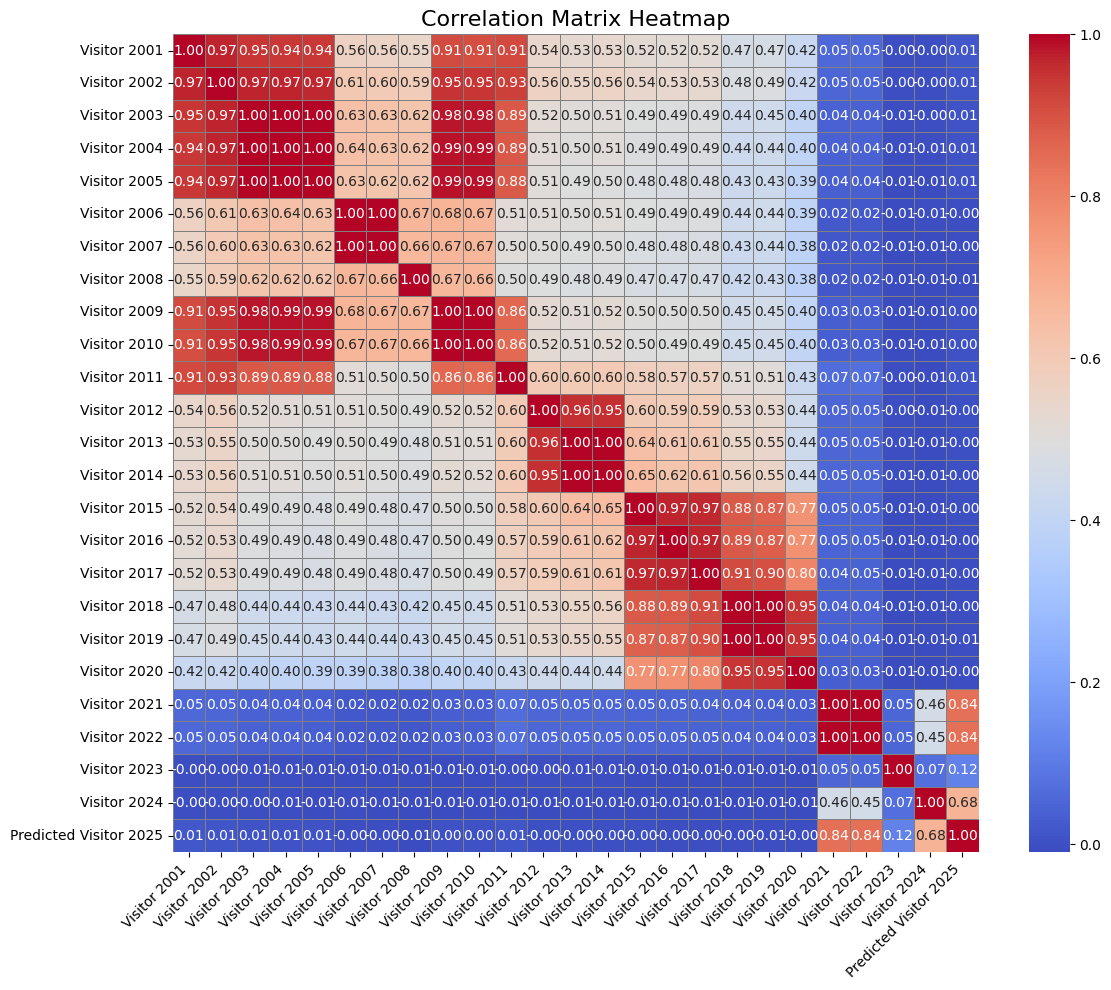

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns from the pivot table
df_numeric = pivot_df.select_dtypes(include='number')

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))  # Increase figure size for better visibility

# Create the heatmap
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, linecolor='gray', cbar=True)

# Rotate the x and y axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate x labels
plt.yticks(rotation=0)  # Keep y labels horizontal

# Add title
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Show the heatmap
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()


In [ ]:
from google.colab import files
files.download(output_file)  # This will allow you to download 'visitors_predictions_2025.xlsx'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>